# Session 3


In [8]:
import pandas as pd
from matplotlib import pyplot  as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# identifying outliers by plotting

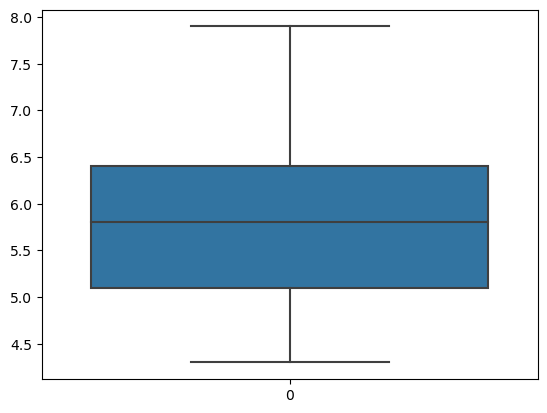

In [7]:
sns.boxplot(df['SepalLengthCm']);

# dealing with outliers using iqr

In [9]:
Q1 = df['SepalLengthCm'].quantile(0.25)
Q3 = df['SepalLengthCm'].quantile(0.75)

IQR = Q3 - Q1
IQR

1.3000000000000007

In [11]:
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

print(upper)
print(lower)

8.350000000000001
3.1499999999999986


In [14]:
out1 = df[df['SepalLengthCm'] < lower].values
out2 = df[df['SepalLengthCm'] > upper].values

df['SepalLengthCm'].replace(out1,lower,inplace=True)
df['SepalLengthCm'].replace(out2,upper,inplace=True)

print(df['SepalLengthCm'])

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLengthCm, Length: 150, dtype: float64


# (-__-)(o_o)(=__=)(>_<)(<>_<>)(;_;)(\/_\/)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [16]:
log_reg = LogisticRegression()
pca = PCA(n_components = 2)

In [20]:
X = df.iloc[:,1:5]
y = df.iloc[:,5]

In [22]:
pca.fit(X)
X = pca.transform(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.3)

In [25]:
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9777777777777777
